In [44]:
# Ensure that modules are reloaded whenever a cell is run to pick up changes to development
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# Import Packages
import json
from gsopt.analysis import *
from gsopt.utils import filter_warnings, get_time_string

filter_warnings() # Supress cartopy warnings

In [46]:
# Load Example Solution

# Single-satellite example
solution_file = '../data/single_sat_solution.json'

# Multi-satellite example
# solution_file = '../data/multi_sat_solution.json'

# Load Solution Data
solution = load_solution(solution_file)


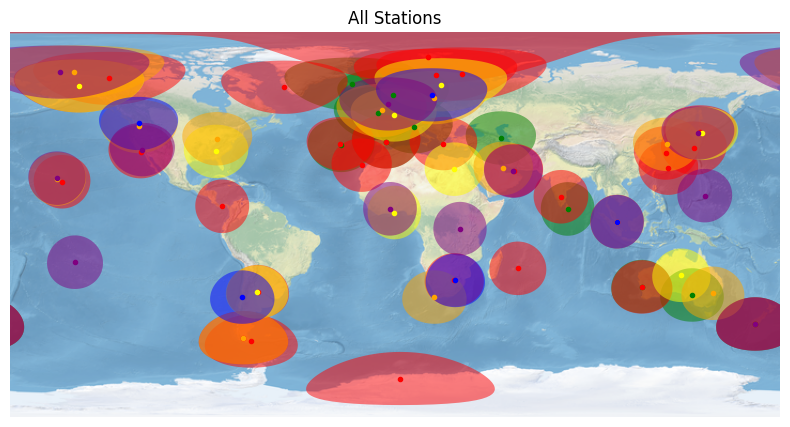

In [47]:
# Plot solution stations
fig_all_stations, ax_all_stations = plot_solution_stations(solution)
ax_all_stations.set_title('All Stations');

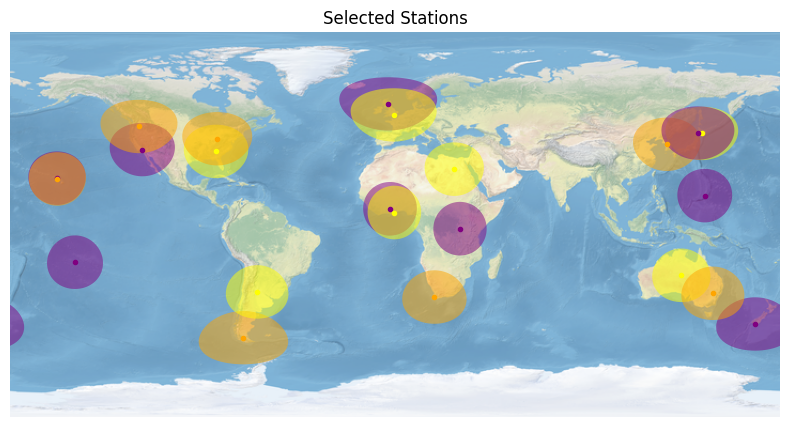

In [48]:
# Plot selected stations
fig_sel_stations, ax_sel_stations = plot_solution_stations(solution, selected_only=True)
ax_sel_stations.set_title('Selected Stations');

In [49]:
# Contact Analysis
contact_statistics = compute_contact_statistics(solution.contacts)

# Display contact duration histogram
contact_duration_hist = plot_contact_duration_histogram(solution.contacts, units='seconds', x_axis_min=200)
contact_duration_hist.show()

In [50]:
# Gap analysis
contact_gaps = compute_contact_gaps(solution.contacts)
contact_gap_hist = plot_contact_gap_histogram(contact_gaps, units='minutes')
contact_gap_hist.show()

In [43]:
# Compute Gap Statistics
gap_statistics = compute_gap_statistics(contact_gaps['all'])

# Display Gap Statistics
print(f'Number of Gaps:       {gap_statistics["num_gaps"]}')
print(f'Minimum Gap Duration: {get_time_string(gap_statistics["min_gap_duration"])}')
print(f'Maximum Gap Duration: {get_time_string(gap_statistics["max_gap_duration"])}')
print(f'Mean Gap Duration:    {get_time_string(gap_statistics["mean_gap_duration"])}')

Number of Gaps:       126
Minimum Gap Duration: 5 minutes and 33.00 seconds
Maximum Gap Duration: 1 hours, 40 minutes, and 36.00 seconds
Mean Gap Duration:    1 hours, 12 minutes, and 48.96 seconds


In [13]:
min([g['gap_duration'] for g in contact_gaps])

333.0